## **EDA**

In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading in the dataset
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Checking if there are any null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0, 0.5, 'CHARGES')

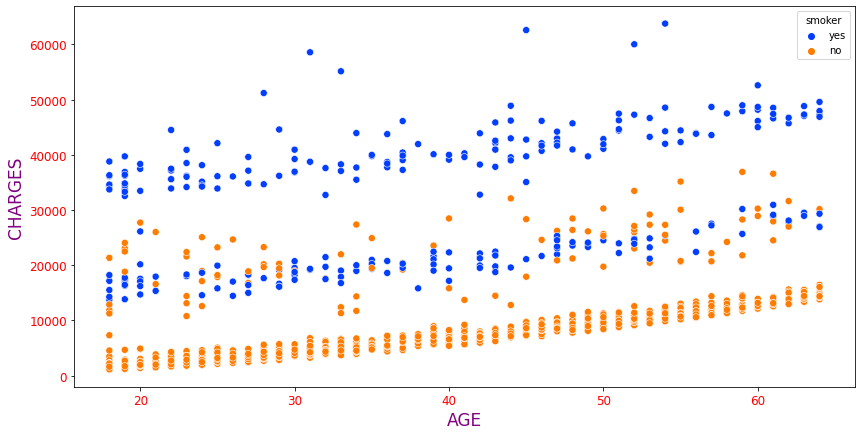

In [16]:
# Plotting the relationship b/w charges and Age on a scatterplot with hue as smoker

plt.figure(figsize = (14,7))
sns.scatterplot(x=df['age'] ,y=df['charges'] ,hue=df['smoker'] ,palette = 'bright' ,s=50)
plt.xticks(color='red' ,size=12)
plt.yticks(color='red' ,size= 12)
plt.xlabel('AGE' ,color='purple' ,size=17)
plt.ylabel('CHARGES' ,color='purple' ,size=17);

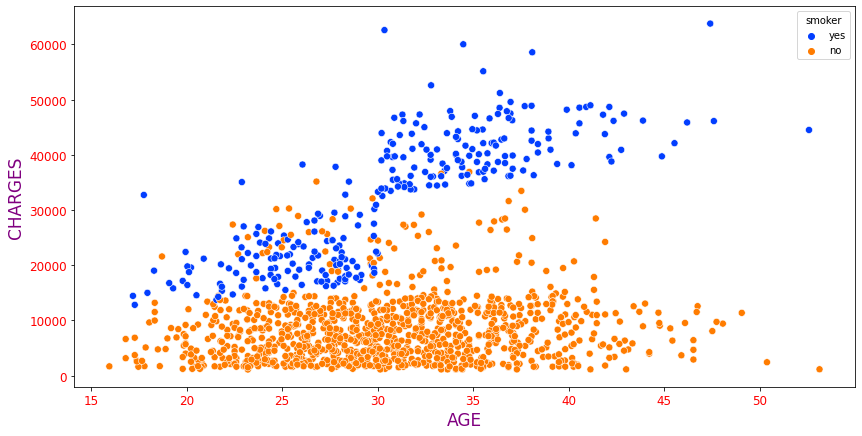

In [20]:
# Plotting a scatterplot b/w charges and bmi with hue as 'smoker'

plt.figure(figsize = (14,7))
sns.scatterplot(x=df['bmi'] ,y=df['charges'] ,hue=df['smoker'] ,palette = 'bright' ,s=50)
plt.xticks(color='red' ,size=12)
plt.yticks(color='red' ,size= 12)
plt.xlabel('BMI' ,color='purple' ,size=17)
plt.ylabel('CHARGES' ,color='purple' ,size=17);

In [26]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

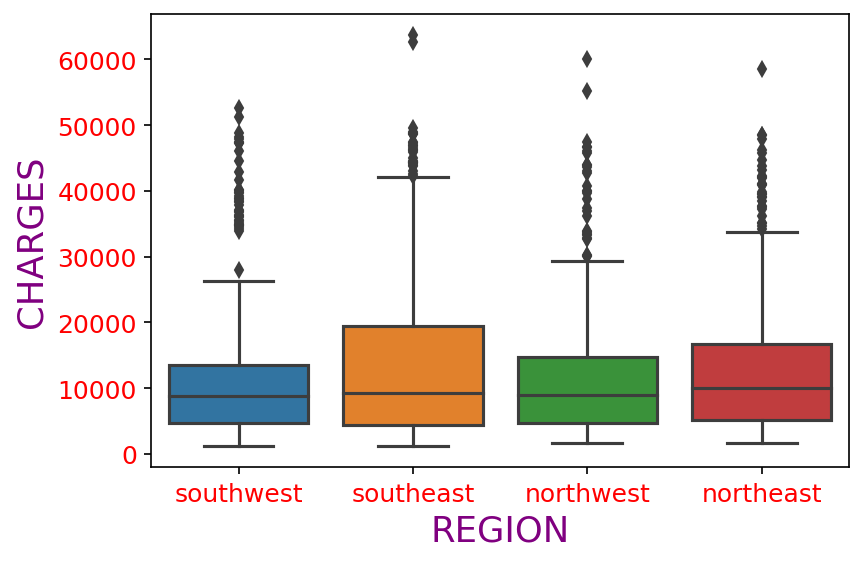

In [30]:
# Checking the relationship b/w charges for different regions
plt.figure(dpi=150)
sns.boxplot(x=df['region'] ,y=df['charges'] )
plt.xticks(color='red' ,size=12)
plt.yticks(color='red' ,size= 12)
plt.xlabel('REGION' ,color='purple' ,size=17)
plt.ylabel('CHARGES' ,color='purple' ,size=17);

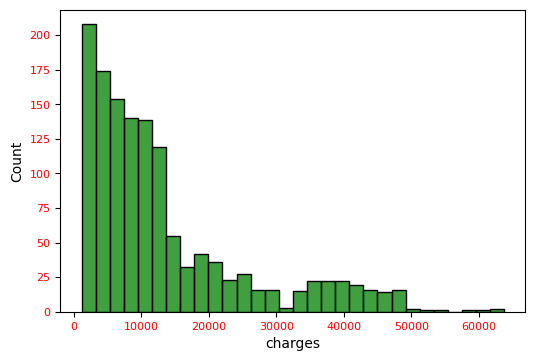

In [34]:
# Checking the distribution of charges
plt.figure(dpi=100)
sns.histplot(x=df['charges'] ,color='green')
plt.xticks(color='red' ,size=8)
plt.yticks(color='red' ,size= 8);


In [38]:
# Doing one-hot encoding for all the categorical columns
df2 = pd.get_dummies(df ,drop_first = True)
df2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [39]:
# Checking out the correlation
df2.corr()['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
sex_male            0.057292
smoker_yes          0.787251
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

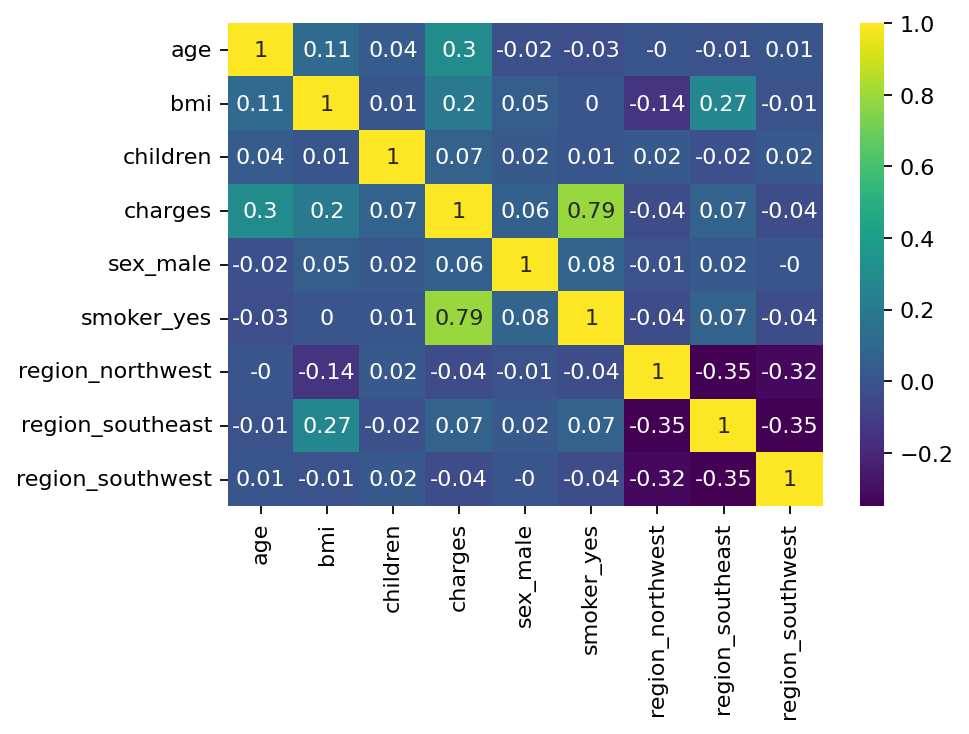

In [43]:
# Plotting a heatmap for above
plt.figure(dpi=160)
sns.heatmap(np.round(df2.corr() ,2) ,annot=True ,cmap='viridis');

---
# Modelling Experiments using 5 different models

In [44]:
# Defining features and labels
X = df2.drop('charges' ,axis=1)
y = df2['charges']

In [47]:
# Doing the train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
len(X_train) ,len(y_test)

(1070, 268)

In [51]:
# Doing some preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model 1: Linear regression

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_X_train ,y_train)

LinearRegression()

In [58]:
# Checking the performance
from sklearn.metrics import mean_squared_error ,r2_score
lr.score(scaled_X_test ,y_test)

0.7835929767120723

In [59]:
r2_score(y_test ,lr.predict(scaled_X_test))

0.7835929767120723

## Model 2 : Random Forest model

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rf = RandomForestRegressor(n_estimators = 140,
                              criterion = 'mse',
                              random_state = 42,
                              n_jobs = -1)

rf.fit(scaled_X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=140, n_jobs=-1,
                      random_state=42)

In [83]:
forest_test_pred = rf.predict(scaled_X_test)

In [84]:
r2_score(y_pred = forest_test_pred ,y_true = y_test)

0.8650776528213561

### So the score has improved from .78 to .87

## Model 3: Support Vector Machine with GridSearchCV

In [86]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [94]:
svr = SVR()

In [95]:
# defining the parameter grid for gridsearchcv
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [96]:
grid = GridSearchCV(svr,param_grid=param_grid)

In [97]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [98]:
# checking out the best params
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [99]:
grid_preds = grid.predict(scaled_X_test)

In [100]:
r2_score(y_true = y_test ,y_pred=grid_preds)

0.019799220771840598

### So very poor performance from a SVR model.

## Model 4 : GradientBoost model

In [102]:
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
gb = GradientBoostingRegressor(random_state = 42)

In [104]:
gb.fit(scaled_X_train ,y_train)

GradientBoostingRegressor(random_state=42)

In [105]:
gb_preds = gb.predict(scaled_X_test)

In [107]:
r2_score(y_true = y_test ,y_pred = gb_preds)

0.8792571359795264

### So we are getting score of 0.88 with gradient boost model which his higher than the previous ones.

## Model 5 : A dense neural network

In [108]:
import tensorflow as tf


In [123]:
scaled_X_train.shape

(1070, 8)

In [141]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(32 ,activation='relu'), #by default activation = None
                             tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae ,   # we could also write loss = 'mae'
              optimizer = tf.keras.optimizers.Adam(learning_rate =0.1),
              metrics = ['mae']) 

model.fit(scaled_X_train ,
          y_train ,epochs=500,
          validation_data = (scaled_X_test ,y_test))

Epoch 1/500
34/34 [==============================] - 1s 7ms/step - loss: 13163.2197 - mae: 13163.2197 - val_loss: 12319.1709 - val_mae: 12319.1709
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 11652.1777 - mae: 11652.1777 - val_loss: 9956.3369 - val_mae: 9956.3369
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 8757.4248 - mae: 8757.4248 - val_loss: 7297.4824 - val_mae: 7297.4824
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 6181.8398 - mae: 6181.8398 - val_loss: 5208.8047 - val_mae: 5208.8047
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 4561.9497 - mae: 4561.9497 - val_loss: 3753.6633 - val_mae: 3753.6633
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 3716.0898 - mae: 3716.0898 - val_loss: 3416.8203 - val_mae: 3416.8203
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 3534.4556 - mae: 3534.4556 - val_loss: 3296.4524 - val_mae: 329

In [142]:
model_preds = model.predict(scaled_X_test)

In [143]:
r2_score(y_true = y_test ,y_pred = model_preds)

0.8618196121577176

### So our simple dense model gives score of 0.86